# Question 1
---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr

$\textbf{Subquestion 2}$:

In [2]:
# Load data
wine = pd.read_csv("Wine dataset.csv")
print(wine.head())

# Select predictors (X) and outcomes (Y)
predictors = ["class", "Alcohol", "Color intensity", "Hue"]
X = wine[predictors].values  # shape: (n, p)

Y = wine[["Magnesium", "Flavanoids"]].values  # shape: (n, 2)
n, p = X.shape


   class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0             5.64  1.04                          3.92      1065  
1             4.38  1.05

In [4]:
## First pass: Marginal Model for y_1 = Magnesium

y1 = Y[:, 0]  # Magnesium

with pm.Model() as model_mg:
    # Priors for regression coefficients
    alpha_1 = pm.Normal("alpha_1", mu=0, sigma=10)
    beta_1 = pm.Normal("beta_1", mu=0, sigma=10, shape=p)
    sigma_1 = pm.Exponential("sigma_1", 1.0)
    
    # Linear predictor
    mu_1 = alpha_1 + pm.math.dot(X, beta_1)
    
    # Likelihood
    likelihood_mg = pm.Normal("likelihood_mg", mu=mu_1, sigma=sigma_1, observed=y1)
    
    # Sample from posterior
    trace_mg = pm.sample(
        draws=5000, tune=1000, chains=4, target_accept=0.9
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_1, beta_1, sigma_1]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 38 seconds.


In [5]:
# Summarize
az.summary(trace_mg, var_names=["alpha_1", "beta_1", "sigma_1"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_1,11.750,9.341,-5.428,29.566,0.093,0.072,10134.0,11431.0,1.0
beta_1[0],-0.487,1.412,-3.205,2.094,0.012,0.010,14068.0,12854.0,1.0
beta_1[1],5.994,0.874,4.302,7.589,0.009,0.007,8686.0,10662.0,1.0
beta_1[2],0.647,0.580,-0.415,1.762,0.006,0.004,10246.0,12245.0,1.0
beta_1[3],7.953,4.980,-1.354,17.193,0.047,0.034,11033.0,12111.0,1.0
sigma_1,13.400,0.691,12.117,14.703,0.006,0.005,13049.0,11996.0,1.0


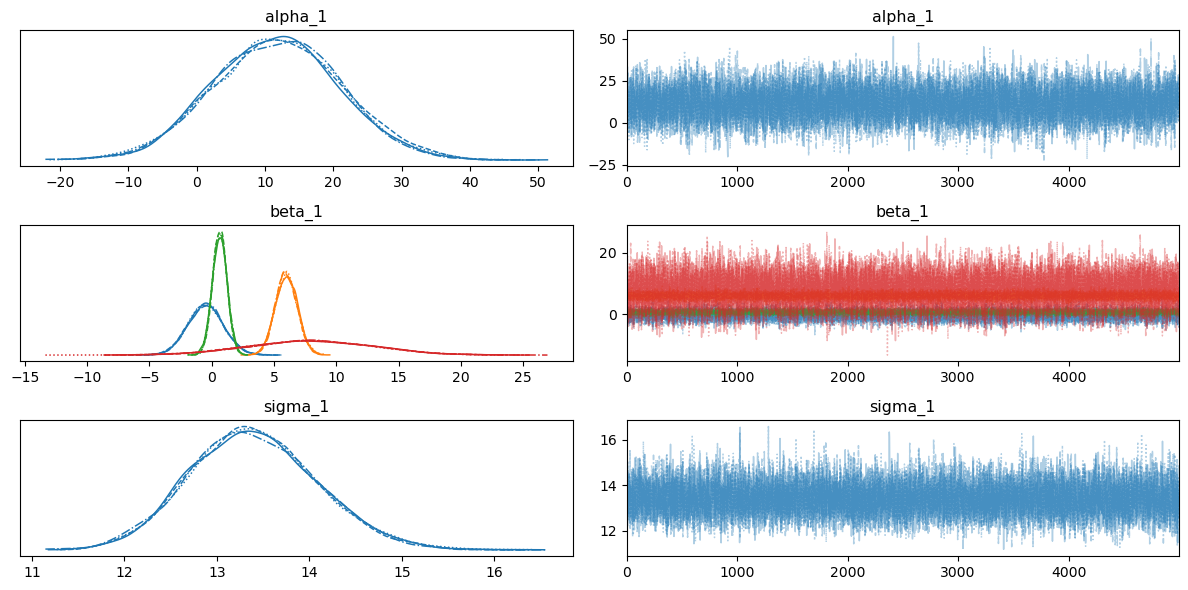

In [9]:
az.plot_trace(trace_mg, var_names=["alpha_1", "beta_1", "sigma_1"])
plt.tight_layout()
plt.show()

In [10]:
### First pass: Marginal Model for y_2 = Flavanoids

y2 = Y[:, 1]  # Flavanoids

with pm.Model() as model_flav:
    alpha_2 = pm.Normal("alpha_2", mu=0, sigma=10)
    beta_2 = pm.Normal("beta_2", mu=0, sigma=10, shape=p)
    sigma_2 = pm.Exponential("sigma_2", 1.0)
    
    mu_2 = alpha_2 + pm.math.dot(X, beta_2)
    
    likelihood_flav = pm.Normal("likelihood_flav", mu=mu_2, sigma=sigma_2, observed=y2)
    
    trace_flav = pm.sample(
        draws=5000, tune=1000, chains=4, target_accept=0.9
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_2, beta_2, sigma_2]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 73 seconds.


In [11]:
az.summary(trace_flav, var_names=["alpha_2", "beta_2", "sigma_2"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_2,6.091,1.021,4.211,8.055,0.013,0.009,6139.0,8638.0,1.0
beta_2[0],-1.166,0.076,-1.309,-1.021,0.001,0.001,7240.0,9945.0,1.0
beta_2[1],-0.195,0.072,-0.330,-0.061,0.001,0.001,6309.0,8446.0,1.0
beta_2[2],0.084,0.026,0.033,0.131,0.000,0.000,8039.0,10995.0,1.0
beta_2[3],0.329,0.249,-0.143,0.788,0.003,0.002,8999.0,10784.0,1.0
sigma_2,0.521,0.028,0.469,0.575,0.000,0.000,12151.0,11862.0,1.0


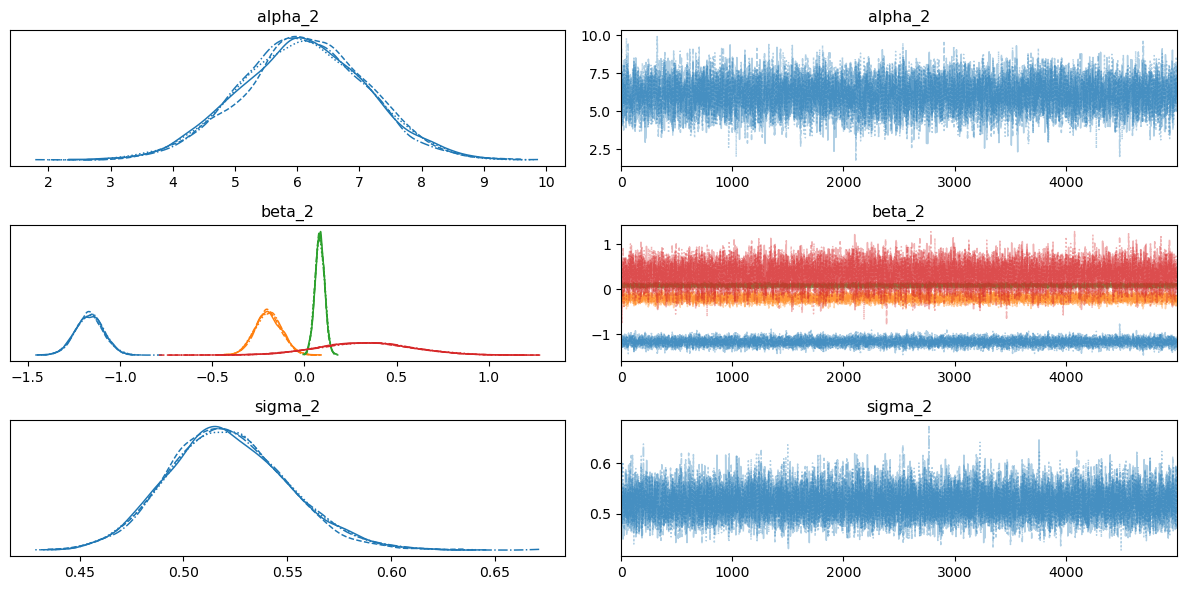

In [13]:
az.plot_trace(trace_flav, var_names=["alpha_2", "beta_2", "sigma_2"])
plt.tight_layout()
plt.show()

In [14]:
### Transform Observed Data to Uniform Scale

# Extract posterior means for the first pass
alpha_1_mean = trace_mg.posterior["alpha_1"].mean().values
beta_1_mean  = trace_mg.posterior["beta_1"].mean(dim=("chain","draw")).values
sigma_1_mean = trace_mg.posterior["sigma_1"].mean().values

alpha_2_mean = trace_flav.posterior["alpha_2"].mean().values
beta_2_mean  = trace_flav.posterior["beta_2"].mean(dim=("chain","draw")).values
sigma_2_mean = trace_flav.posterior["sigma_2"].mean().values

# Compute the predicted mean for each observation
mu_1_hat = alpha_1_mean + X.dot(beta_1_mean)
mu_2_hat = alpha_2_mean + X.dot(beta_2_mean)

# Convert each y to uniform scale using Normal CDF with mean=mu_i, std=sigma_i
u1 = st.norm.cdf(y1, loc=mu_1_hat, scale=sigma_1_mean)
u2 = st.norm.cdf(y2, loc=mu_2_hat, scale=sigma_2_mean)

# Stack them into a (n,2) array in uniform space
U = np.column_stack((u1, u2))


In [17]:
### Second Pass: Fit a Gaussian Copula to the [0,1] data

n, _ = U.shape

# Clip U to avoid exact 0 or 1 values, which can cause issues with inverse CDF
U_clipped = np.clip(U, 1e-6, 1 - 1e-6)

with pm.Model() as copula_model:
    # Step 1: Define the correlation parameter (rho) for the Gaussian copula
    rho = pm.Uniform("rho", lower=-1, upper=1)  # Correlation between the two variables
    
    # Step 2: Construct the covariance matrix for the multivariate normal
    cov = pm.math.stack([[1, rho], [rho, 1]])  # 2x2 correlation matrix (diagonal = 1)
    
    # Step 3: Define the multivariate normal distribution (latent variables)
    z = pm.MvNormal("z", mu=[0, 0], cov=cov, shape=(n, 2))
    
    # Step 4: Transform latent normal variables to uniform [0,1] via CDF
    u_sim = pm.Deterministic("u_sim", pm.math.invprobit(z))  # invprobit = normal CDF
    
    # Step 5: Likelihood - compare transformed uniforms to observed U
    # Use a uniform distribution and transform the observed U to normal space for comparison
    z_obs = pm.Normal("z_obs", mu=0, sigma=1, observed=st.norm.ppf(U_clipped))
    
    # Step 6: Sample from the posterior
    trace_copula = pm.sample(
        draws=5000, tune=2000, chains=4, target_accept=0.95
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rho, z]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 1511 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [23]:
az.summary(trace_copula, var_names=["rho", "u_sim", "z"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rho,-0.069,0.565,-0.977,0.814,0.086,0.020,38.0,91.0,1.09
"u_sim[0, 0]",0.498,0.292,0.000,0.940,0.002,0.001,32426.0,14601.0,1.00
"u_sim[0, 1]",0.501,0.290,0.039,0.977,0.002,0.001,29946.0,15348.0,1.00
"u_sim[1, 0]",0.499,0.288,0.036,0.972,0.002,0.001,33358.0,15282.0,1.00
"u_sim[1, 1]",0.500,0.288,0.037,0.974,0.002,0.001,32504.0,16214.0,1.00
...,...,...,...,...,...,...,...,...,...
"z[175, 1]",0.001,0.996,-1.920,1.854,0.006,0.007,30499.0,15423.0,1.00
"z[176, 0]",-0.001,1.005,-1.868,1.921,0.006,0.007,30600.0,15291.0,1.00
"z[176, 1]",-0.006,1.010,-1.802,1.962,0.006,0.007,30938.0,15200.0,1.00
"z[177, 0]",-0.005,0.995,-1.894,1.836,0.006,0.007,27364.0,15566.0,1.00


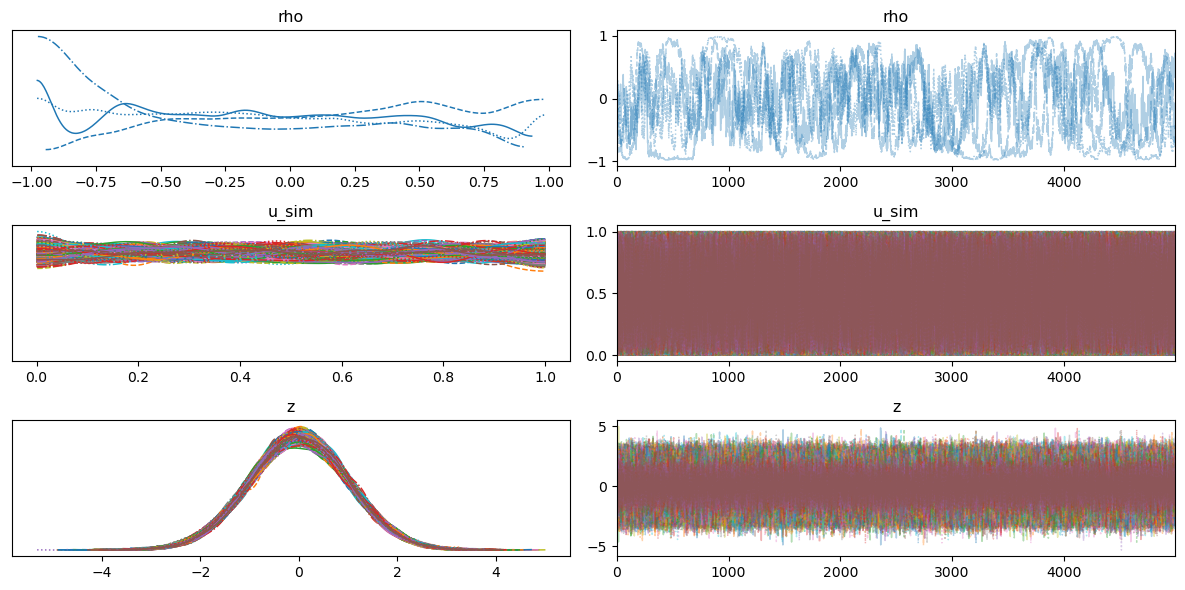

In [26]:
az.plot_trace(trace_copula, var_names=["rho", "u_sim", "z"])
plt.tight_layout()
plt.show()

rho is pretty bad but the rest look good.

$\textbf{Subquestion 3}$: 

Given a joint probability distribution $f$, we can decompose it into its marginals which by definition are uncorrelated. However, the random variables that make up $f$ may be correlated, so a method for taking that into account in a statistical model is needed. The copula is the function that combines marginals in a way that respects the correlation between their random variables.

The version from subquestion 1 jointly models the marginals and the copula, fitting the parameters of the marginal distributions $(p0, p1, p2)$ alongside the dependence structure. The version from subquestion 2 assumes the marginals are already handled and focuses on the dependence structure of pre-transformed uniform data.

$\textbf{Subquestion 4}$:

GLMs typically assume independence between responses, but introducing a copula can capture dependence between variables. To implement this, for each response variable $y_i$ we can choose a marginal distribution then define a linear predictor 

$$\eta_i = \alpha_i + X\beta$$

where $X$ are the predictors, $\alpha_i$ the intercept, and $\beta$ the regression coefficients. Then for $\mu_i = E(y_i)$, apply a link function $g$ so that $g(\mu_i) = \eta_i$. For the work done so far, the marginal behavior of each $y_i$ is independent.

Then, for each $y_i$, we compute its CDF $u_i = F_i(y_i)$ which by statistical theory will be distributed Uniform$[0,1]$. Then choose a copula. Estimate parameters of the marginal GLMs and the copula parameters. The likelihood will combine the marginal likelihoods and the copula density.

# Question 2
---

In [30]:
wine = pd.read_csv('Wine dataset.csv')
print(wine.head())

predictors = wine.drop(columns=["class", "Magnesium", "Flavanoids"]).values
X = (predictors - predictors.mean(axis=0)) / predictors.std(axis=0)  # Standardize predictors
y_magnesium = wine["Magnesium"].values
y_flavanoids = wine["Flavanoids"].values
n, p = X.shape  # n = 5 observations, p = 11 predictors

   class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0             5.64  1.04                          3.92      1065  
1             4.38  1.05

In [31]:
with pm.Model() as model_mg_spike_slab:
    # Spike and slab priors for regression coefficients
    gamma_mg = pm.Bernoulli("gamma_mg", p=0.5, shape=p)  # Inclusion probability for each predictor
    sigma_spike = 0.01  # Small variance for the spike
    sigma_slab = 10.0   # Large variance for the slab
    beta_spike = pm.Normal("beta_spike_mg", mu=0, sigma=sigma_spike, shape=p)
    beta_slab = pm.Normal("beta_slab_mg", mu=0, sigma=sigma_slab, shape=p)
    beta_mg = pm.Deterministic("beta_mg", gamma_mg * beta_slab + (1 - gamma_mg) * beta_spike)

    # Intercept and variance
    alpha_mg = pm.Normal("alpha_mg", mu=0, sigma=10)
    sigma_mg = pm.Exponential("sigma_mg", 1.0)

    # Linear predictor
    mu_mg = alpha_mg + pm.math.dot(X, beta_mg)

    # Likelihood
    y_mg = pm.Normal("y_mg", mu=mu_mg, sigma=sigma_mg, observed=y_magnesium)

    # Sample
    trace_mg = pm.sample(
        draws=5000,
        tune=1000,
        chains=4,
        target_accept=0.95,
        return_inferencedata=True
    )

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [gamma_mg]
>NUTS: [beta_spike_mg, beta_slab_mg, alpha_mg, sigma_mg]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 49 seconds.


In [43]:
with pm.Model() as model_flav_spike_slab:
    # Spike and slab priors for regression coefficients
    gamma_flav = pm.Bernoulli("gamma_flav", p=0.5, shape=p)  # Inclusion probability for each predictor
    sigma_spike = 0.01  # Small variance for the spike
    sigma_slab = 10.0   # Large variance for the slab
    beta_spike = pm.Normal("beta_spike_flav", mu=0, sigma=sigma_spike, shape=p)
    beta_slab = pm.Normal("beta_slab_flav", mu=0, sigma=sigma_slab, shape=p)
    beta_flav = pm.Deterministic("beta_flav", gamma_flav * beta_slab + (1 - gamma_flav) * beta_spike)

    # Intercept and variance
    alpha_flav = pm.Normal("alpha_flav", mu=0, sigma=10)
    sigma_flav = pm.Exponential("sigma_flav", 1.0)

    # Linear predictor
    mu_flav = alpha_flav + pm.math.dot(X, beta_flav)

    # Likelihood
    y_flav = pm.Normal("y_flav", mu=mu_flav, sigma=sigma_flav, observed=y_flavanoids)

    # Sample
    trace_flav = pm.sample(
        draws=5000,
        tune=1000,
        chains=4,
        target_accept=0.95,
        return_inferencedata=True
    )

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>BinaryGibbsMetropolis: [gamma_flav]
>NUTS: [beta_spike_flav, beta_slab_flav, alpha_flav, sigma_flav]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 424 seconds.
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 4709 divergences after tuning. Increase `target_accept` or reparameterize.


In [34]:
# Posterior inclusion probabilities for Magnesium
gamma_mg_mean = trace_mg.posterior["gamma_mg"].mean(dim=("chain", "draw")).values
predictor_names = wine.drop(columns=["class", "Magnesium", "Flavanoids"]).columns
inclusion_probs_mg = pd.DataFrame({
    "Predictor": predictor_names,
    "Inclusion Probability": gamma_mg_mean
})
print("Inclusion Probabilities for Magnesium:")
print(inclusion_probs_mg)

Inclusion Probabilities for Magnesium:
                       Predictor  Inclusion Probability
0                        Alcohol                0.12410
1                     Malic acid                0.09990
2                            Ash                0.99240
3              Alcalinity of ash                0.13620
4                  Total phenols                0.15135
5           Nonflavanoid phenols                0.96435
6                Proanthocyanins                0.49835
7                Color intensity                0.14120
8                            Hue                0.11800
9   OD280/OD315 of diluted wines                0.72355
10                      Proline                 0.96055


In [54]:
# Selected predictors (using a threshold of 0.5)
selected_predictors_mg = predictor_names[gamma_mg_mean > 0.5]
print("\nSelected Predictors for Magnesium (threshold = 0.5):")
print(selected_predictors_mg)


Selected Predictors for Magnesium (threshold = 0.5):
Index(['Ash', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines',
       'Proline '],
      dtype='object')


In [44]:
# Posterior inclusion probabilities for Flavanoids
gamma_flav_mean = trace_flav.posterior["gamma_flav"].mean(dim=("chain", "draw")).values
predictor_names = wine.drop(columns=["class", "Magnesium", "Flavanoids"]).columns
inclusion_probs_flav = pd.DataFrame({
    "Predictor": predictor_names,
    "Inclusion Probability": gamma_flav_mean
})
print("Inclusion Probabilities for Flavanoids:")
print(inclusion_probs_flav)

Inclusion Probabilities for Flavanoids:
                       Predictor  Inclusion Probability
0                        Alcohol                0.00470
1                     Malic acid                0.03240
2                            Ash                0.00790
3              Alcalinity of ash                0.01360
4                  Total phenols                1.00000
5           Nonflavanoid phenols                0.10190
6                Proanthocyanins                0.72405
7                Color intensity                0.00455
8                            Hue                0.10655
9   OD280/OD315 of diluted wines                1.00000
10                      Proline                 0.03435


In [55]:
# Selected predictors (using a threshold of 0.5)
selected_predictors_flav = predictor_names[gamma_flav_mean > 0.5]
print("\nSelected Predictors for Flavanoids (threshold = 0.5):")
print(selected_predictors_flav)


Selected Predictors for Flavanoids (threshold = 0.5):
Index(['Total phenols', 'Proanthocyanins', 'OD280/OD315 of diluted wines'], dtype='object')


In [37]:
az.summary(trace_mg, var_names=["gamma_mg", "beta_mg"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
gamma_mg[0],0.124,0.330,0.000,1.000,0.004,0.004,7594.0,7594.0,1.00
gamma_mg[1],0.100,0.300,0.000,1.000,0.003,0.004,11629.0,11629.0,1.00
gamma_mg[2],0.992,0.087,1.000,1.000,0.002,0.014,1300.0,20000.0,1.00
gamma_mg[3],0.136,0.343,0.000,1.000,0.005,0.005,5512.0,5512.0,1.00
gamma_mg[4],0.151,0.358,0.000,1.000,0.004,0.004,6989.0,6989.0,1.00
gamma_mg[5],0.964,0.185,1.000,1.000,0.007,0.019,626.0,20000.0,1.01
gamma_mg[6],0.498,0.500,0.000,1.000,0.011,0.000,2124.0,2124.0,1.00
gamma_mg[7],0.141,0.348,0.000,1.000,0.004,0.004,6738.0,6738.0,1.00
gamma_mg[8],0.118,0.323,0.000,1.000,0.003,0.004,9513.0,9513.0,1.00
gamma_mg[9],0.724,0.447,0.000,1.000,0.013,0.007,1116.0,1116.0,1.01


In [45]:
az.summary(trace_flav, var_names=["gamma_flav", "beta_flav"])

/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
gamma_flav[0],0.005,0.068,0.000,0.000,0.001,0.007,4821.0,4821.0,1.00
gamma_flav[1],0.032,0.177,0.000,0.000,0.008,0.020,533.0,533.0,1.01
gamma_flav[2],0.008,0.089,0.000,0.000,0.001,0.008,3550.0,3550.0,1.00
gamma_flav[3],0.014,0.116,0.000,0.000,0.002,0.010,2310.0,2310.0,1.00
gamma_flav[4],1.000,0.000,1.000,1.000,0.000,NaN,20000.0,20000.0,NaN
gamma_flav[5],0.102,0.303,0.000,1.000,0.047,0.062,42.0,42.0,1.06
gamma_flav[6],0.724,0.447,0.000,1.000,0.174,0.087,7.0,7.0,1.63
gamma_flav[7],0.005,0.067,0.000,0.000,0.001,0.009,3017.0,3017.0,1.00
gamma_flav[8],0.107,0.309,0.000,1.000,0.023,0.030,174.0,174.0,1.04
gamma_flav[9],1.000,0.000,1.000,1.000,0.000,NaN,20000.0,20000.0,NaN


Spike-and-slab doesn't seem to work very well for the flavanoid part of the dataset.

In [50]:
with pm.Model() as model_mg_diffuse:
    # Diffuse normal priors for regression coefficients
    beta_mg = pm.Normal("beta_mg", mu=0, sigma=10, shape=p)  # Diffuse prior with large variance

    # Intercept and variance
    alpha_mg = pm.Normal("alpha_mg", mu=0, sigma=10)
    sigma_mg = pm.Exponential("sigma_mg", 1.0)

    # Linear predictor
    mu_mg = alpha_mg + pm.math.dot(X, beta_mg)

    # Likelihood
    y_mg = pm.Normal("y_mg", mu=mu_mg, sigma=sigma_mg, observed=y_magnesium)

    # Sample
    trace_mg_diffuse = pm.sample(
        draws=5000,
        tune=2000,
        chains=4,
        target_accept=0.95,
        return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_mg, alpha_mg, sigma_mg]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 16 seconds.


In [46]:
with pm.Model() as model_flav_diffuse:
    # Diffuse normal priors for regression coefficients
    beta_flav = pm.Normal("beta_flav", mu=0, sigma=10, shape=p)  # Diffuse prior with large variance

    # Intercept and variance
    alpha_flav = pm.Normal("alpha_flav", mu=0, sigma=10)
    sigma_flav = pm.Exponential("sigma_flav", 1.0)

    # Linear predictor
    mu_flav = alpha_flav + pm.math.dot(X, beta_flav)

    # Likelihood
    y_flav = pm.Normal("y_flav", mu=mu_flav, sigma=sigma_flav, observed=y_flavanoids)

    # Sample
    trace_flav_diffuse = pm.sample(
        draws=5000,
        tune=2000,
        chains=4,
        target_accept=0.95,
        return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_flav, alpha_flav, sigma_flav]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 17 seconds.


In [52]:
# Posterior summary of the coefficients for Magnesium
summary_mg = az.summary(trace_mg_diffuse, var_names=["beta_mg", "alpha_mg", "sigma_mg"])
beta_summary_mg = summary_mg.loc[[f"beta_mg[{i}]" for i in range(p)]].copy()
beta_summary_mg["Predictor"] = predictor_names
beta_summary_mg = beta_summary_mg[["Predictor", "mean", "sd", "hdi_3%", "hdi_97%"]]
print("Posterior Summary for Magnesium Coefficients:")
print(beta_summary_mg)

Posterior Summary for Magnesium Coefficients:
                                Predictor   mean     sd  hdi_3%  hdi_97%
beta_mg[0]                        Alcohol  0.003  1.399  -2.600    2.689
beta_mg[1]                     Malic acid -0.142  1.150  -2.390    1.962
beta_mg[2]                            Ash  4.481  1.225   2.148    6.735
beta_mg[3]              Alcalinity of ash -0.680  1.322  -3.150    1.797
beta_mg[4]                  Total phenols -0.596  1.543  -3.474    2.324
beta_mg[5]           Nonflavanoid phenols -4.106  1.127  -6.205   -1.972
beta_mg[6]                Proanthocyanins  2.625  1.191   0.467    4.905
beta_mg[7]                Color intensity -0.076  1.556  -3.119    2.779
beta_mg[8]                            Hue  0.486  1.412  -2.226    3.041
beta_mg[9]   OD280/OD315 of diluted wines -3.679  1.624  -6.775   -0.708
beta_mg[10]                      Proline   3.445  1.464   0.680    6.186


In [53]:
# Identify "important" predictors (e.g., 94% HDI does not include 0)
important_predictors_mg = beta_summary_mg[
    ~((beta_summary_mg["hdi_3%"] <= 0) & (beta_summary_mg["hdi_97%"] >= 0))
]["Predictor"].values
print("\nImportant Predictors for Magnesium (94% HDI does not include 0):")
print(important_predictors_mg)


Important Predictors for Magnesium (94% HDI does not include 0):
['Ash' 'Nonflavanoid phenols' 'Proanthocyanins'
 'OD280/OD315 of diluted wines' 'Proline ']


In [57]:
# Posterior summary of the coefficients for Flavanoids
summary_flav = az.summary(trace_flav_diffuse, var_names=["beta_flav", "alpha_flav", "sigma_flav"])
beta_summary_flav = summary_flav.loc[[f"beta_flav[{i}]" for i in range(p)]].copy()
beta_summary_flav["Predictor"] = predictor_names
beta_summary_flav = beta_summary_flav[["Predictor", "mean", "sd", "hdi_3%", "hdi_97%"]]
print("Posterior Summary for Flavanoids Coefficients:")
print(beta_summary_flav)

Posterior Summary for Flavanoids Coefficients:
                                  Predictor   mean     sd  hdi_3%  hdi_97%
beta_flav[0]                        Alcohol  0.004  0.047  -0.088    0.089
beta_flav[1]                     Malic acid -0.047  0.038  -0.116    0.025
beta_flav[2]                            Ash  0.119  0.041   0.041    0.196
beta_flav[3]              Alcalinity of ash -0.075  0.044  -0.158    0.007
beta_flav[4]                  Total phenols  0.445  0.051   0.349    0.541
beta_flav[5]           Nonflavanoid phenols -0.110  0.037  -0.180   -0.042
beta_flav[6]                Proanthocyanins  0.153  0.039   0.079    0.226
beta_flav[7]                Color intensity -0.000  0.052  -0.097    0.097
beta_flav[8]                            Hue  0.098  0.046   0.011    0.185
beta_flav[9]   OD280/OD315 of diluted wines  0.241  0.053   0.142    0.342
beta_flav[10]                      Proline   0.018  0.049  -0.075    0.109


In [58]:
# Identify "important" predictors (e.g., 94% HDI does not include 0)
important_predictors_flav = beta_summary_flav[
    ~((beta_summary_flav["hdi_3%"] <= 0) & (beta_summary_flav["hdi_97%"] >= 0))
]["Predictor"].values
print("\nImportant Predictors for Flavanoids (94% HDI does not include 0):")
print(important_predictors_flav)


Important Predictors for Flavanoids (94% HDI does not include 0):
['Ash' 'Total phenols' 'Nonflavanoid phenols' 'Proanthocyanins' 'Hue'
 'OD280/OD315 of diluted wines']


In [60]:
az.summary(trace_mg_diffuse, var_names=["beta_mg", "alpha_mg", "sigma_mg"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_mg[0],0.003,1.399,-2.600,2.689,0.010,0.010,20718.0,15996.0,1.0
beta_mg[1],-0.142,1.150,-2.390,1.962,0.008,0.007,21363.0,16143.0,1.0
beta_mg[2],4.481,1.225,2.148,6.735,0.010,0.008,16559.0,15688.0,1.0
beta_mg[3],-0.680,1.322,-3.150,1.797,0.010,0.008,17073.0,15656.0,1.0
beta_mg[4],-0.596,1.543,-3.474,2.324,0.011,0.011,20276.0,15716.0,1.0
beta_mg[5],-4.106,1.127,-6.205,-1.972,0.007,0.008,25320.0,16381.0,1.0
beta_mg[6],2.625,1.191,0.467,4.905,0.008,0.008,22568.0,16024.0,1.0
beta_mg[7],-0.076,1.556,-3.119,2.779,0.012,0.010,17154.0,15355.0,1.0
beta_mg[8],0.486,1.412,-2.226,3.041,0.010,0.009,19908.0,15924.0,1.0
beta_mg[9],-3.679,1.624,-6.775,-0.708,0.012,0.010,18640.0,15933.0,1.0


In [59]:
az.summary(trace_flav_diffuse, var_names=["beta_flav", "alpha_flav", "sigma_flav"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_flav[0],0.004,0.047,-0.088,0.089,0.0,0.0,19490.0,14234.0,1.0
beta_flav[1],-0.047,0.038,-0.116,0.025,0.0,0.0,21591.0,15197.0,1.0
beta_flav[2],0.119,0.041,0.041,0.196,0.0,0.0,18010.0,16575.0,1.0
beta_flav[3],-0.075,0.044,-0.158,0.007,0.0,0.0,17893.0,15759.0,1.0
beta_flav[4],0.445,0.051,0.349,0.541,0.0,0.0,18789.0,15967.0,1.0
beta_flav[5],-0.110,0.037,-0.180,-0.042,0.0,0.0,23422.0,15980.0,1.0
beta_flav[6],0.153,0.039,0.079,0.226,0.0,0.0,22093.0,15544.0,1.0
beta_flav[7],-0.000,0.052,-0.097,0.097,0.0,0.0,15847.0,15997.0,1.0
beta_flav[8],0.098,0.046,0.011,0.185,0.0,0.0,17311.0,14463.0,1.0
beta_flav[9],0.241,0.053,0.142,0.342,0.0,0.0,16778.0,15638.0,1.0


The diffuse prior method doesn't run into MCMC sampling issues, suggesting it may be a better model for the data.

# Question 3
---

In [2]:
wine = pd.read_csv('Wine dataset.csv')
print(wine.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [61]:
with pm.Model() as model_mg_horseshoe:
    # Horseshoe prior for regression coefficients
    tau_mg = pm.HalfCauchy("tau_mg", beta=1)  # Global shrinkage parameter
    lambda_mg = pm.HalfCauchy("lambda_mg", beta=1, shape=p)  # Local shrinkage parameters
    sigma_beta_mg = pm.Deterministic("sigma_beta_mg", tau_mg * lambda_mg)  # Effective standard deviation

    # Regression coefficients
    beta_mg = pm.Normal("beta_mg", mu=0, sigma=sigma_beta_mg, shape=p)

    # Approximate inclusion probability
    gamma_mg = pm.Deterministic("gamma_mg", pm.math.sigmoid(sigma_beta_mg / sigma_beta_mg.max()))

    # Intercept and variance
    alpha_mg = pm.Normal("alpha_mg", mu=0, sigma=10)
    sigma_mg = pm.Exponential("sigma_mg", 1.0)

    # Linear predictor
    mu_mg = alpha_mg + pm.math.dot(X, beta_mg)

    # Likelihood
    y_mg = pm.Normal("y_mg", mu=mu_mg, sigma=sigma_mg, observed=y_magnesium)

    # Sample
    trace_mg_horseshoe = pm.sample(
        draws=5000,
        tune=2000,
        chains=4,
        target_accept=0.95,
        return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau_mg, lambda_mg, beta_mg, alpha_mg, sigma_mg]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 115 seconds.
There were 1213 divergences after tuning. Increase `target_accept` or reparameterize.


In [62]:
with pm.Model() as model_flav_horseshoe:
    # Horseshoe prior for regression coefficients
    tau_flav = pm.HalfCauchy("tau_flav", beta=1)  # Global shrinkage parameter
    lambda_flav = pm.HalfCauchy("lambda_flav", beta=1, shape=p)  # Local shrinkage parameters
    sigma_beta_flav = pm.Deterministic("sigma_beta_flav", tau_flav * lambda_flav)  # Effective standard deviation

    # Regression coefficients
    beta_flav = pm.Normal("beta_flav", mu=0, sigma=sigma_beta_flav, shape=p)

    # Approximate inclusion probability
    gamma_flav = pm.Deterministic("gamma_flav", pm.math.sigmoid(sigma_beta_flav / sigma_beta_flav.max()))

    # Intercept and variance
    alpha_flav = pm.Normal("alpha_flav", mu=0, sigma=10)
    sigma_flav = pm.Exponential("sigma_flav", 1.0)

    # Linear predictor
    mu_flav = alpha_flav + pm.math.dot(X, beta_flav)

    # Likelihood
    y_flav = pm.Normal("y_flav", mu=mu_flav, sigma=sigma_flav, observed=y_flavanoids)

    # Sample
    trace_flav_horseshoe = pm.sample(
        draws=5000,
        tune=2000,
        chains=4,
        target_accept=0.95,
        return_inferencedata=True
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau_flav, lambda_flav, beta_flav, alpha_flav, sigma_flav]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 65 seconds.
There were 796 divergences after tuning. Increase `target_accept` or reparameterize.


In [63]:
# Posterior inclusion probabilities for Magnesium
gamma_mg_mean = trace_mg_horseshoe.posterior["gamma_mg"].mean(dim=("chain", "draw")).values
inclusion_probs_mg = pd.DataFrame({
    "Predictor": predictor_names,
    "Inclusion Probability": gamma_mg_mean
})
print("Inclusion Probabilities for Magnesium:")
print(inclusion_probs_mg)

Inclusion Probabilities for Magnesium:
                       Predictor  Inclusion Probability
0                        Alcohol               0.543795
1                     Malic acid               0.539953
2                            Ash               0.636126
3              Alcalinity of ash               0.544130
4                  Total phenols               0.544199
5           Nonflavanoid phenols               0.623770
6                Proanthocyanins               0.569950
7                Color intensity               0.546523
8                            Hue               0.542607
9   OD280/OD315 of diluted wines               0.578389
10                      Proline                0.631081


In [64]:
# Selected predictors (using a threshold of 0.5)
selected_predictors_mg = predictor_names[gamma_mg_mean > 0.5]
print("\nSelected Predictors for Magnesium (threshold = 0.5):")
print(selected_predictors_mg)


Selected Predictors for Magnesium (threshold = 0.5):
Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Total phenols',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')


In [65]:
# Posterior summary of the coefficients
summary_mg = az.summary(trace_mg_horseshoe, var_names=["beta_mg", "alpha_mg", "sigma_mg"])
beta_summary_mg = summary_mg.loc[[f"beta_mg[{i}]" for i in range(p)]].copy()
beta_summary_mg["Predictor"] = predictor_names
beta_summary_mg = beta_summary_mg[["Predictor", "mean", "sd", "hdi_3%", "hdi_97%"]]
print("\nPosterior Summary for Magnesium Coefficients:")
print(beta_summary_mg)


Posterior Summary for Magnesium Coefficients:
                                Predictor   mean     sd  hdi_3%  hdi_97%
beta_mg[0]                        Alcohol  0.163  0.779  -1.271    1.877
beta_mg[1]                     Malic acid -0.082  0.651  -1.522    1.142
beta_mg[2]                            Ash  3.483  1.257   1.059    5.849
beta_mg[3]              Alcalinity of ash -0.188  0.812  -1.922    1.387
beta_mg[4]                  Total phenols -0.090  0.835  -1.796    1.640
beta_mg[5]           Nonflavanoid phenols -3.126  1.347  -5.561   -0.374
beta_mg[6]                Proanthocyanins  1.272  1.135  -0.438    3.421
beta_mg[7]                Color intensity  0.337  0.849  -1.145    2.188
beta_mg[8]                            Hue  0.099  0.748  -1.328    1.711
beta_mg[9]   OD280/OD315 of diluted wines -1.653  1.476  -4.424    0.502
beta_mg[10]                      Proline   3.180  1.441  -0.052    5.489


In [66]:
# Identify "important" predictors (e.g., 94% HDI does not include 0)
important_predictors_mg = beta_summary_mg[
    ~((beta_summary_mg["hdi_3%"] <= 0) & (beta_summary_mg["hdi_97%"] >= 0))
]["Predictor"].values
print("\nImportant Predictors for Magnesium (94% HDI does not include 0):")
print(important_predictors_mg)


Important Predictors for Magnesium (94% HDI does not include 0):
['Ash' 'Nonflavanoid phenols']


In [67]:
# Posterior inclusion probabilities for Flavanoids
gamma_flav_mean = trace_flav_horseshoe.posterior["gamma_flav"].mean(dim=("chain", "draw")).values
inclusion_probs_flav = pd.DataFrame({
    "Predictor": predictor_names,
    "Inclusion Probability": gamma_flav_mean
})
print("Inclusion Probabilities for Flavanoids:")
print(inclusion_probs_flav)

Inclusion Probabilities for Flavanoids:
                       Predictor  Inclusion Probability
0                        Alcohol               0.535751
1                     Malic acid               0.545580
2                            Ash               0.566240
3              Alcalinity of ash               0.550841
4                  Total phenols               0.678160
5           Nonflavanoid phenols               0.569994
6                Proanthocyanins               0.586068
7                Color intensity               0.536817
8                            Hue               0.567247
9   OD280/OD315 of diluted wines               0.620778
10                      Proline                0.540760


In [68]:
# Selected predictors (using a threshold of 0.5)
selected_predictors_flav = predictor_names[gamma_flav_mean > 0.5]
print("\nSelected Predictors for Flavanoids (threshold = 0.5):")
print(selected_predictors_flav)


Selected Predictors for Flavanoids (threshold = 0.5):
Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Total phenols',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')


In [69]:
# Posterior summary of the coefficients
summary_flav = az.summary(trace_flav_horseshoe, var_names=["beta_flav", "alpha_flav", "sigma_flav"])
beta_summary_flav = summary_flav.loc[[f"beta_flav[{i}]" for i in range(p)]].copy()
beta_summary_flav["Predictor"] = predictor_names
beta_summary_flav = beta_summary_flav[["Predictor", "mean", "sd", "hdi_3%", "hdi_97%"]]
print("\nPosterior Summary for Flavanoids Coefficients:")
print(beta_summary_flav)


Posterior Summary for Flavanoids Coefficients:
                                  Predictor   mean     sd  hdi_3%  hdi_97%
beta_flav[0]                        Alcohol  0.008  0.032  -0.053    0.074
beta_flav[1]                     Malic acid -0.038  0.036  -0.107    0.022
beta_flav[2]                            Ash  0.089  0.042   0.005    0.163
beta_flav[3]              Alcalinity of ash -0.050  0.042  -0.131    0.018
beta_flav[4]                  Total phenols  0.464  0.052   0.367    0.560
beta_flav[5]           Nonflavanoid phenols -0.098  0.039  -0.169   -0.022
beta_flav[6]                Proanthocyanins  0.142  0.042   0.062    0.221
beta_flav[7]                Color intensity -0.002  0.036  -0.076    0.068
beta_flav[8]                            Hue  0.090  0.046  -0.001    0.171
beta_flav[9]   OD280/OD315 of diluted wines  0.245  0.053   0.150    0.347
beta_flav[10]                      Proline   0.025  0.038  -0.041    0.102


In [70]:
# Identify "important" predictors (e.g., 94% HDI does not include 0)
important_predictors_flav = beta_summary_flav[
    ~((beta_summary_flav["hdi_3%"] <= 0) & (beta_summary_flav["hdi_97%"] >= 0))
]["Predictor"].values
print("\nImportant Predictors for Flavanoids (94% HDI does not include 0):")
print(important_predictors_flav)


Important Predictors for Flavanoids (94% HDI does not include 0):
['Ash' 'Total phenols' 'Nonflavanoid phenols' 'Proanthocyanins'
 'OD280/OD315 of diluted wines']


In [71]:
az.summary(trace_mg_horseshoe, var_names=["beta_mg", "gamma_mg", "alpha_mg", "sigma_mg"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_mg[0],0.163,0.779,-1.271,1.877,0.009,0.011,8700.0,7733.0,1.0
beta_mg[1],-0.082,0.651,-1.522,1.142,0.007,0.009,8773.0,6954.0,1.0
beta_mg[2],3.483,1.257,1.059,5.849,0.014,0.011,8206.0,7960.0,1.0
beta_mg[3],-0.188,0.812,-1.922,1.387,0.009,0.010,9364.0,8244.0,1.0
beta_mg[4],-0.090,0.835,-1.796,1.640,0.010,0.012,6756.0,8229.0,1.0
beta_mg[5],-3.126,1.347,-5.561,-0.374,0.023,0.014,3399.0,1943.0,1.0
beta_mg[6],1.272,1.135,-0.438,3.421,0.014,0.008,6988.0,11501.0,1.0
beta_mg[7],0.337,0.849,-1.145,2.188,0.011,0.011,5521.0,6732.0,1.0
beta_mg[8],0.099,0.748,-1.328,1.711,0.009,0.010,6701.0,8720.0,1.0
beta_mg[9],-1.653,1.476,-4.424,0.502,0.027,0.024,3411.0,1936.0,1.0


In [72]:
az.summary(trace_flav_horseshoe, var_names=["beta_flav", "gamma_flav", "alpha_flav", "sigma_flav"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_flav[0],0.008,0.032,-0.053,0.074,0.000,0.000,10754.0,8626.0,1.0
beta_flav[1],-0.038,0.036,-0.107,0.022,0.000,0.000,10325.0,13312.0,1.0
beta_flav[2],0.089,0.042,0.005,0.163,0.000,0.000,9303.0,7315.0,1.0
beta_flav[3],-0.050,0.042,-0.131,0.018,0.001,0.000,5590.0,3102.0,1.0
beta_flav[4],0.464,0.052,0.367,0.560,0.000,0.000,13567.0,13534.0,1.0
beta_flav[5],-0.098,0.039,-0.169,-0.022,0.000,0.000,14966.0,8424.0,1.0
beta_flav[6],0.142,0.042,0.062,0.221,0.000,0.001,8148.0,5130.0,1.0
beta_flav[7],-0.002,0.036,-0.076,0.068,0.000,0.000,9021.0,4037.0,1.0
beta_flav[8],0.090,0.046,-0.001,0.171,0.000,0.000,9334.0,5634.0,1.0
beta_flav[9],0.245,0.053,0.150,0.347,0.000,0.000,12324.0,12663.0,1.0


These results appear much more reliable than the one from spike and slab because the latter had many r_hat values that weren't equal to 1. 